In [235]:
#Observations

#1.Cities located between the -20 and 20 degrees latitude band have the highest temperatures. Temperatures decrease as cities 
#  move away from this band on either side. 

#2.Cloudiness and humidity are evenly distributed across the latitude. Majority of the cities have greater than 
# 50% of the humidity.

#4.About 80% of the cities have wind speeds below 20 mph, and there is no clear trend between wind speed and latitude.

In [1]:
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import openweathermapy.core as owm
from citipy import citipy
from datetime import datetime
import time

In [2]:
owmkey = "f23de46e6c0b3500090a3e67a71e4eb2"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
settings =  {"units": "imperial", "APPID": owmkey}

In [3]:
cities = []
name = []
country = []
 
lat = np.random.uniform(low=-90, high=90, size=600)
lon = np.random.uniform(low=-180, high=180, size=600)

for lat,lon in zip(lat,lon):
    cities.append(citipy.nearest_city(lat,lon))

for city in cities:   
    name.append(city.city_name)
    country.append(city.country_code)
 
#locations = list(zip(name,country))

weather_dict = {"City": name, "Country": country} 
weather_pd = pd.DataFrame(weather_dict)

In [4]:
weather_data = []
data = []
units = "Imperial"

for index, row in weather_pd.iterrows(): 
    try:
        location = f'{row["City"]},{row["Country"]}'
        query_url = f"{base_url}appid={owmkey}&units={units}&q={location}"
        weather_data = owm.get_current(location, **settings)
        print(f"Processing {location}")
        print(query_url)
        views = {"summary": ["name","sys.country","clouds.all","dt","main.humidity","coord.lat","coord.lon","main.temp_max",
                             "wind.speed"]}
        
        data.append(weather_data.get_dict(views["summary"]))
    except Exception:
        #print(f'{row['City']},{row['Country']}not found')
     #   print ("  exception  ")
        pass
        
weather_data_pd = pd.DataFrame(data)

weather_data_pd.head()

weather_data_pd = weather_data_pd.rename(columns={"name":"City","clouds.all":"Cloudiness","sys.country":"Country",
                                               "dt":"Date","main.humidity":"Humidity","coord.lat":"Lat","coord.lon":"Lng",
                                               "main.temp_max":"Max Temp","wind.speed":"Wind Speed"})



weather_data_pd = weather_data_pd[["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]]  

#weather_data_pdhvs = weather_data_pd[['City']]  

weather_data_pd.to_csv("CityWeatherData.csv", index=False)
weather_data_pd.to_json("CityWeatherData.json")
weather_data_pd.head()

Processing lahat,id
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=lahat,id
Processing sao joao da barra,br
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=sao joao da barra,br
Processing kapaa,us
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=kapaa,us
Processing rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=rikitea,pf
Processing dayong,cn
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=dayong,cn
Processing medea,dz
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=medea,dz
Processing winslow,us
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=winslow,us
Processing angoche,mz
http://api.openweath

Processing khatanga,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=khatanga,ru
Processing carnarvon,au
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=carnarvon,au
Processing tabuk,sa
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=tabuk,sa
Processing mar del plata,ar
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=mar del plata,ar
Processing mapiripan,co
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=mapiripan,co
Processing puerto ayora,ec
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=puerto ayora,ec
Processing mahebourg,mu
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=mahebourg,mu
Processing dikso

Processing cape town,za
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=cape town,za
Processing bluff,nz
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=bluff,nz
Processing castro,cl
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=castro,cl
Processing yantal,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=yantal,ru
Processing tolaga bay,nz
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=tolaga bay,nz
Processing turukhansk,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=turukhansk,ru
Processing monkey bay,mw
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=monkey bay,mw
Processing port alfred,za
http://a

Processing amga,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=amga,ru
Processing rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=rikitea,pf
Processing rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=rikitea,pf
Processing qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=qaanaaq,gl
Processing punta arenas,cl
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=punta arenas,cl
Processing atuona,pf
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=atuona,pf
Processing tiznit,ma
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=tiznit,ma
Processing ahvaz,ir
http://api.openweathermap.or

Processing yellowknife,ca
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=yellowknife,ca
Processing lorengau,pg
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=lorengau,pg
Processing nantucket,us
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=nantucket,us
Processing rabo de peixe,pt
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=rabo de peixe,pt
Processing ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=ushuaia,ar
Processing puerto maldonado,pe
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=puerto maldonado,pe
Processing bredasdorp,za
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=bredasdorp,z

Processing buraydah,sa
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=buraydah,sa
Processing grindavik,is
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=grindavik,is
Processing rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=rikitea,pf
Processing ostrovnoy,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=ostrovnoy,ru
Processing albany,au
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=albany,au
Processing puerto leguizamo,co
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=puerto leguizamo,co
Processing hithadhoo,mv
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=hithadhoo,mv
Processing busselt

Processing hermanus,za
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=hermanus,za
Processing salalah,om
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=salalah,om
Processing san cristobal,ec
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=san cristobal,ec
Processing east london,za
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=east london,za
Processing labytnangi,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=labytnangi,ru
Processing dikson,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=dikson,ru
Processing rudbar,af
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=rudbar,af
Processing marsh harbour

Processing high level,ca
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=high level,ca
Processing jamestown,sh
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=jamestown,sh
Processing ekhabi,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=ekhabi,ru
Processing fort frances,ca
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=fort frances,ca
Processing hermanus,za
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=hermanus,za
Processing tiksi,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=tiksi,ru
Processing atar,mr
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=atar,mr
Processing rikitea,pf
http://api.openw

Processing swan river,ca
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=swan river,ca
Processing dikson,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=dikson,ru
Processing marquette,us
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=marquette,us
Processing tekeli,kz
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=tekeli,kz
Processing hobart,au
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=hobart,au
Processing yerbogachen,ru
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=yerbogachen,ru
Processing georgetown,sh
http://api.openweathermap.org/data/2.5/weather?appid=f23de46e6c0b3500090a3e67a71e4eb2&units=Imperial&q=georgetown,sh
Processing atuona,pf
http://ap

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lahat,64,ID,1521505958,98,-3.78,103.55,72.35,2.73
1,Sao Joao da Barra,0,BR,1521500400,78,-21.64,-41.05,78.80,9.17
2,Kapaa,90,US,1521500160,73,22.08,-159.32,75.20,14.99
3,Rikitea,44,PF,1521504314,100,-23.12,-134.97,79.55,15.82
4,Dayong,75,CN,1521500400,100,25.02,118.29,60.80,13.42


In [5]:
sns.set()
raw_time = weather_data_pd.iloc[0,3]
date = time.strftime('%m/%d/%Y',time.gmtime(raw_time))

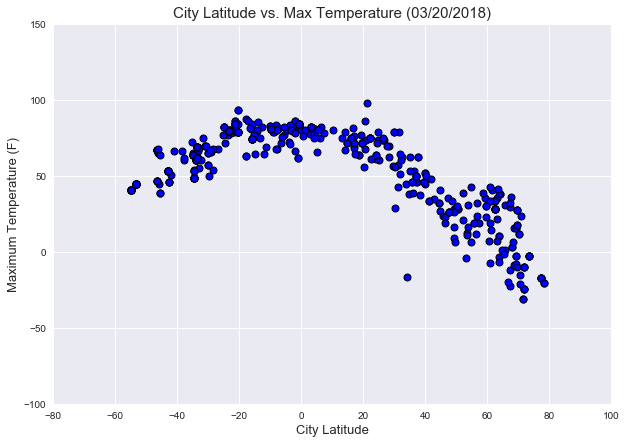

In [6]:
plt.figure(figsize=(10,7))
plt.xlim(-80,100)
plt.ylim(-100,150)
plt.grid(True)
plt.title(f'City Latitude vs. Max Temperature ({date})',fontsize=15)
plt.ylabel("Maximum Temperature (F)",fontsize=13)
plt.xlabel("City Latitude",fontsize=13)
plt.scatter(weather_data_pd["Lat"], weather_data_pd["Max Temp"], facecolors="blue", edgecolors="black", linewidth=1)
plt.savefig("MaximumTemperature.png")
plt.show()

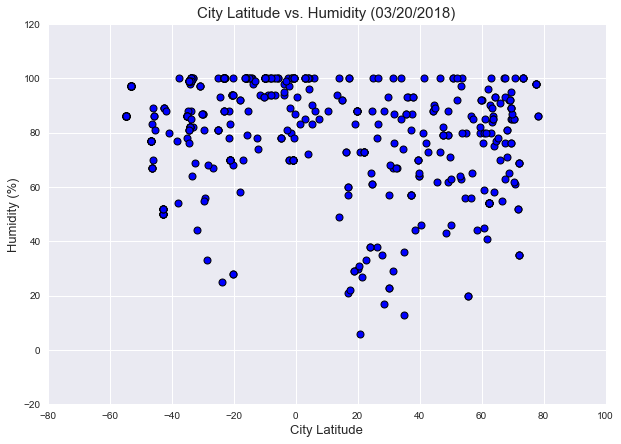

In [7]:
plt.figure(figsize=(10,7))
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid(True) 
plt.title(f'City Latitude vs. Humidity ({date})',fontsize=15)
plt.xlabel("City Latitude",fontsize=13)
plt.ylabel("Humidity (%)",fontsize=13)
plt.scatter(weather_data_pd["Lat"], weather_data_pd["Humidity"], facecolors="blue", edgecolors="black", linewidth=1)
plt.savefig("Humidity.png")
plt.show()

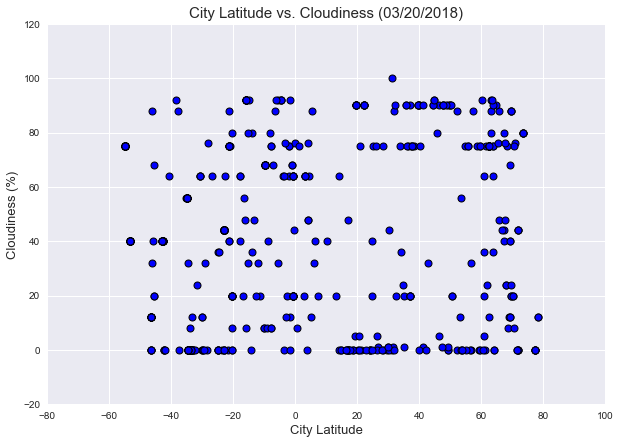

In [8]:
plt.figure(figsize=(10,7))
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid(True) 
plt.title(f'City Latitude vs. Cloudiness ({date})',fontsize=15)
plt.xlabel("City Latitude",fontsize=13)
plt.ylabel("Cloudiness (%)",fontsize=13)
plt.scatter(weather_data_pd["Lat"], weather_data_pd["Cloudiness"], facecolors="blue", edgecolors="black", linewidth=1)
plt.savefig("Cloudiness.png")
plt.show()

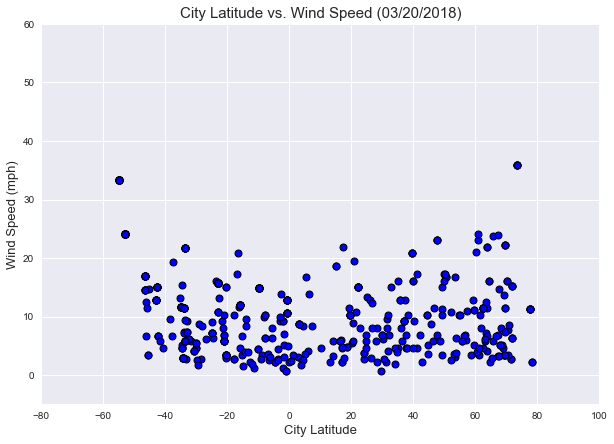

In [9]:
plt.figure(figsize=(10,7))
plt.xlim(-80,100)
plt.ylim(-5,60)
plt.grid(True) 
plt.title(f'City Latitude vs. Wind Speed ({date})', fontsize=15)
plt.xlabel("City Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph)", fontsize=13)
plt.scatter(weather_data_pd["Lat"], weather_data_pd["Wind Speed"], facecolors="blue", edgecolors="black", linewidth=1)
plt.savefig("Wind Speed.png")
plt.show()